In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\RABIN RESIN\\Desktop\\luminar\\development-journey\\mechine learning journey\\exam\\placement.csv.xls")
df.shape

(1000, 3)

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.columns

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

In [5]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [6]:
df[df.duplicated()].count()

cgpa                    19
placement_exam_marks    19
placed                  19
dtype: int64

In [7]:
df[df.duplicated()]

,cgpa,placement_exam_marks,placed
541,6.11,18.0,1
588,6.38,25.0,0
618,6.70,22.0,0
626,7.63,19.0,1
689,8.02,67.0,0
700,6.82,16.0,1
716,7.06,19.0,1
726,7.93,25.0,0
727,7.00,30.0,0
776,7.08,30.0,0


In [8]:
df.drop_duplicates(subset=df,keep='first',inplace=True)

In [9]:
df[df.duplicated()]

,cgpa,placement_exam_marks,placed


In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x

,cgpa,placement_exam_marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0
...,...,...
995,8.87,44.0
996,9.12,65.0
997,4.89,34.0
998,8.62,46.0


In [11]:
y

0      1
1      1
2      1
3      1
4      0
      ..
995    1
996    1
997    0
998    1
999    1
Name: placed, Length: 981, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
xtrain

,cgpa,placement_exam_marks
158,5.74,50.0
154,7.57,54.0
40,6.60,86.0
304,7.12,33.0
822,7.33,32.0
...,...,...
849,7.89,8.0
192,6.67,38.0
633,6.63,39.0
560,7.11,67.0


In [13]:
xtest

,cgpa,placement_exam_marks
474,7.11,25.0
236,7.70,36.0
27,6.53,46.0
625,7.60,30.0
714,7.06,19.0
...,...,...
599,7.02,55.0
37,8.51,9.0
754,7.91,17.0
893,7.07,32.0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtrain

array([[-2.03959014,  0.92217786],
       [ 1.01564255,  1.13228755],
       [-0.60379773,  2.81316506],
       ...,
       [-0.55371195,  0.34437621],
       [ 0.24766056,  1.81514403],
       [-0.62049299,  0.18679395]], shape=(784, 2))

In [15]:
xtest=scaler.transform(xtest)

In [16]:
xtest

array([[ 0.24766056, -0.3910077 ],
       [ 1.23268094,  0.18679395],
       [-0.72066455,  0.71206817],
       [ 1.06572833, -0.12837059],
       [ 0.16418426, -0.70617223],
       [-1.65559915,  0.97470528],
       [ 0.26435582, -0.96880934],
       [-0.16972095, -0.70617223],
       [-0.8709219 , -0.75869965],
       [ 1.18259516, -0.49606254],
       [-0.06954939, -1.17891903],
       [ 0.99894729, -1.28397388],
       [-0.63718825, -0.65364481],
       [ 0.39791791, -0.70617223],
       [ 0.94886151, -1.02133677],
       [ 1.58328141,  0.5544859 ],
       [ 1.93388188, -0.91628192],
       [-0.3199783 ,  1.55250692],
       [-2.47366692, -0.75869965],
       [ 0.2309653 , -0.23342543],
       [ 0.19757478, -0.54858997],
       [ 1.3328525 , -1.17891903],
       [ 0.34783213, -0.33848028],
       [-1.30499867, -0.28595285],
       [ 1.1658999 ,  0.60701332],
       [-0.47023564,  0.23932137],
       [-0.06954939,  2.34041826],
       [-1.0378745 , -1.17891903],
       [ 1.59997667,

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)*100

53.80710659898477

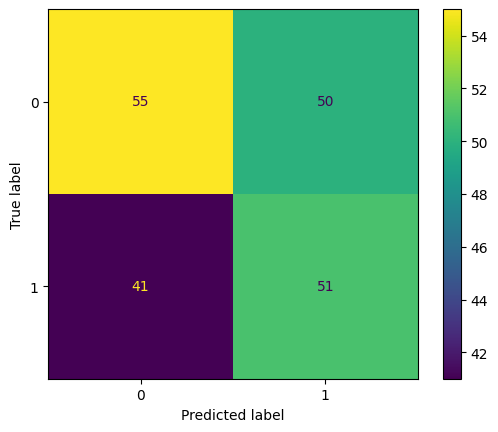

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,f1_score
ConfusionMatrixDisplay.from_predictions(ytest,ypred)


In [20]:
print("precision",precision_score(ytest,ypred))
print("recall",recall_score(ytest,ypred))
print("f1score",f1_score(ytest,ypred))

precision 0.504950495049505
recall 0.5543478260869565
f1score 0.5284974093264249


In [21]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(xtrain,ytrain)
y_pred=gb.predict(xtest)


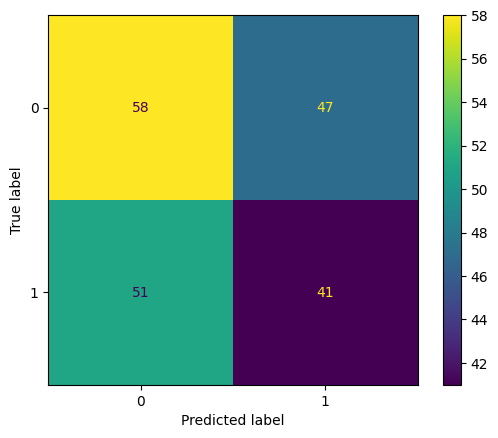

In [22]:
ConfusionMatrixDisplay.from_predictions(ytest,y_pred)

In [23]:
print("accuracy",accuracy_score(ytest,y_pred)*100)
print("precision",precision_score(ytest,y_pred))
print("recall",recall_score(ytest,y_pred))
print("f1score",f1_score(ytest,y_pred))


accuracy 50.25380710659898
precision 0.4659090909090909
recall 0.44565217391304346
f1score 0.45555555555555555


In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",max_depth=4)
dt.fit(xtrain,ytrain)
y_pred_=dt.predict(xtest)

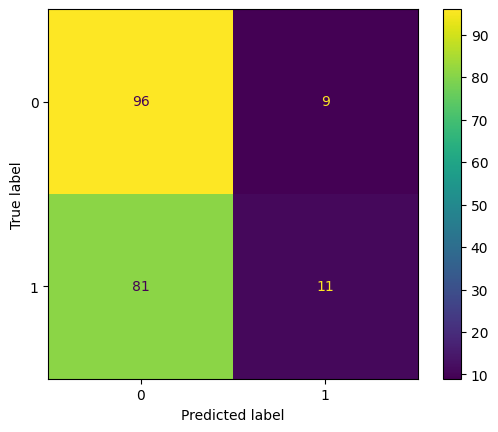

In [25]:
ConfusionMatrixDisplay.from_predictions(ytest,y_pred_)

In [26]:
print("accuracy",accuracy_score(ytest,y_pred_)*100)
print("precision",precision_score(ytest,y_pred_))
print("recall",recall_score(ytest,y_pred_))
print("f1score",f1_score(ytest,y_pred_))


accuracy 54.314720812182735
precision 0.55
recall 0.11956521739130435
f1score 0.19642857142857142


In [27]:
models=[KNeighborsClassifier,GaussianNB,DecisionTreeClassifier]
for model in models:
    md=model()
    md.fit(xtrain,ytrain)
    ypred=md.predict(xtest)
    print("==========",model,"==========")
    print("accuracy",accuracy_score(ytest,ypred)*100)
    print("f1 score",f1_score(ytest,ypred)*100)

========== <class 'sklearn.neighbors._classification.KNeighborsClassifier'> ==========
accuracy 52.28426395939086
f1 score 51.546391752577314
========== <class 'sklearn.naive_bayes.GaussianNB'> ==========
accuracy 50.25380710659898
f1 score 45.55555555555556
========== <class 'sklearn.tree._classes.DecisionTreeClassifier'> ==========
accuracy 51.776649746192895
f1 score 46.927374301675975
